In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
dir_data = '../data/ISBI2012EM/'

name_label = 'train-labels.tif'
name_input = 'train-volume.tif'

img_label = Image.open(os.path.join(dir_data, name_label))
img_input = Image.open(os.path.join(dir_data, name_input))

ny, nx = img_label.size
nframe = img_label.n_frames
print(ny, nx)
print(nframe)


512 512
30


In [5]:
nframe_train = 24
nframe_val = 3
nframe_test = 3

dir_save_train = os.path.join(dir_data, 'train')
dir_save_val = os.path.join(dir_data, 'val')
dir_save_test = os.path.join(dir_data, 'test')

for dir_name in [dir_save_train, dir_save_val, dir_save_test]:
  if not os.path.exists(dir_name):
    os.makedirs(dir_name)

In [6]:
id_frame = np.arange(nframe)
np.random.shuffle(id_frame)

offset_nframe = 0

for i in range(nframe_train):
  img_label.seek(id_frame[i+offset_nframe])
  img_input.seek(id_frame[i+offset_nframe])

  label_ = np.asarray(img_label)
  input_ = np.asarray(img_input)

  np.save(os.path.join(dir_save_train, f'label_{i:03d}.npy'), label_)
  np.save(os.path.join(dir_save_train, f'input_{i:03d}.npy'), input_)



In [7]:
offset_nframe += nframe_train

for i in range(nframe_val):
  img_label.seek(id_frame[i+offset_nframe])
  img_input.seek(id_frame[i+offset_nframe])

  label_ = np.asarray(img_label)
  input_ = np.asarray(img_input)

  np.save(os.path.join(dir_save_val, f'label_{i:03d}.npy'), label_)
  np.save(os.path.join(dir_save_val, f'input_{i:03d}.npy'), input_)

In [8]:

offset_nframe += nframe_val

for i in range(nframe_val):
  img_label.seek(id_frame[i+offset_nframe])
  img_input.seek(id_frame[i+offset_nframe])

  label_ = np.asarray(img_label)
  input_ = np.asarray(img_input)

  np.save(os.path.join(dir_save_test, f'label_{i:03d}.npy'), label_)
  np.save(os.path.join(dir_save_test, f'input_{i:03d}.npy'), input_)

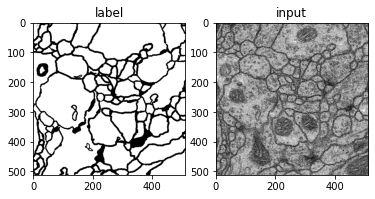

In [9]:
plt.subplot(121)
plt.imshow(label_, cmap='gray')
plt.title('label')

plt.subplot(122)
plt.imshow(input_, cmap='gray')
plt.title('input')

plt.show()